Bonus

In [1]:
%load_ext sql
import psycopg2
import pandas as pd
from config import pass_key
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
conn_string = "host="+ 'localhost' +" port="+ "5432" +" dbname="+"employee-data" +" user=" + "postgres" \
                  +" password="+ pass_key
    
conn = psycopg2.connect(conn_string)

Create a histogram to visualize the most common salary ranges for employees.

In [4]:
sal_count_df = pd.read_sql('SELECT * FROM salaries', conn)
sal_count_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


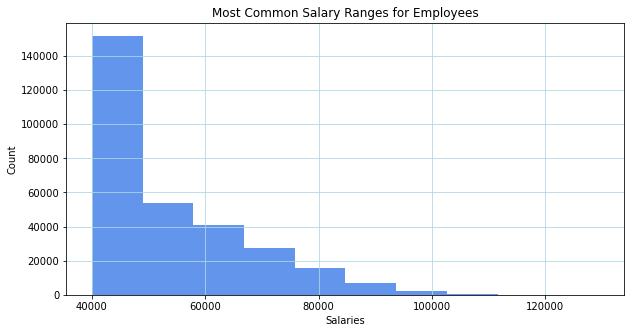

- The mean salary is $52971
- The maximum salary is $129492
- The minimum salary is $40000


In [5]:
plt.figure(figsize=(10, 5))
plt.hist(sal_count_df['salary'], color='cornflowerblue')
plt.title('Most Common Salary Ranges for Employees')
plt.xlabel('Salaries')
plt.ylabel('Count')
plt.grid(color="lightblue")
plt.savefig('Most Common Salary Ranges for Employees')
plt.show()

mean_sal = sal_count_df['salary'].mean()
max_sal = sal_count_df['salary'].max()
min_sal = sal_count_df['salary'].min()

print(f'- The mean salary is ${round(mean_sal)}')
print(f'- The maximum salary is ${round(max_sal)}')
print(f'- The minimum salary is ${round(min_sal)}')

Create a bar chart of average salary by title.

In [6]:
avg_sal_df = pd.read_sql('SELECT * FROM avg_salary', conn)
avg_sal_df

,title,average_salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


In [7]:
titles = avg_sal_df['title'].tolist()
salary = avg_sal_df['average_salary'].tolist()

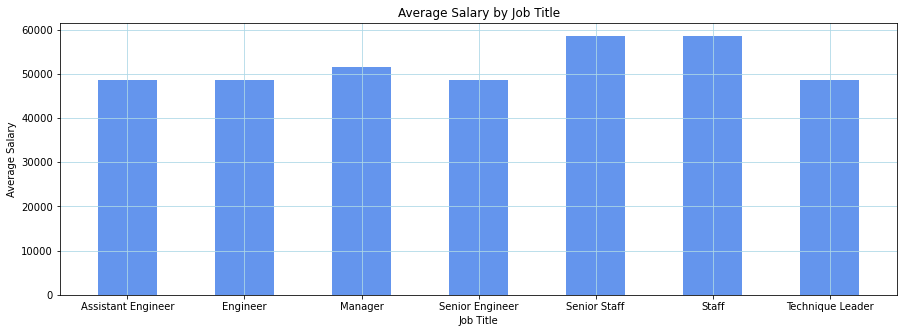

In [8]:
plt.figure(figsize=(15, 5))
plt.bar(titles, salary, color='cornflowerblue', width=.5)

plt.grid(color="lightblue")

plt.title("Average Salary by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.savefig('Average Salary by Job Title')
plt.show()

Epilogue

In [9]:
emp_df = pd.read_sql('SELECT * FROM employees', conn)
emp_df.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [10]:
my_emp_no = emp_df.loc[emp_df['emp_no']==499942]
my_emp_no

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
168736,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
